# Part 1 - Data Cleaning

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
raw_data = pd.read_csv('Red.csv')

In [3]:
raw_data.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


## Preprocessing

### Exploring the descriptive statistics of the variables

In [4]:
raw_data.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
count,8666,8666,8666,8666,8666.000000,8666.000000,8666.000000,8666
unique,6721,30,624,2714,NaN,NaN,NaN,32
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,2016
freq,43,2650,325,40,NaN,NaN,NaN,1776
mean,NaN,NaN,NaN,NaN,3.890342,415.287445,39.145065,NaN
std,NaN,NaN,NaN,NaN,0.308548,899.726373,84.936307,NaN
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,NaN
25%,NaN,NaN,NaN,NaN,3.700000,66.000000,10.680000,NaN
50%,NaN,NaN,NaN,NaN,3.900000,157.000000,18.200000,NaN
75%,NaN,NaN,NaN,NaN,4.100000,401.000000,38.142500,NaN


In [5]:
raw_data.dtypes

Name                object
Country             object
Region              object
Winery              object
Rating             float64
NumberOfRatings      int64
Price              float64
Year                object
dtype: object

#### Converting Year to Float from Object

In [6]:
raw_data['Year'] = pd.to_numeric(raw_data['Year'], errors='coerce')

### Dealing with missing values

In [7]:
raw_data.isnull().sum()

Name               0
Country            0
Region             0
Winery             0
Rating             0
NumberOfRatings    0
Price              0
Year               8
dtype: int64

In [8]:
data_no_mv = raw_data.dropna(axis=0)

In [9]:
data_no_mv.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
count,8658,8658,8658,8658,8658.000000,8658.000000,8658.000000,8658.000000
unique,6713,30,623,2713,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN
freq,43,2646,325,40,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.890148,409.761839,39.149789,2014.818434
std,NaN,NaN,NaN,NaN,0.308429,857.614243,84.963503,3.281252
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,1988.000000
25%,NaN,NaN,NaN,NaN,3.700000,66.000000,10.682500,2014.000000
50%,NaN,NaN,NaN,NaN,3.900000,157.000000,18.200000,2016.000000
75%,NaN,NaN,NaN,NaN,4.100000,400.750000,38.227500,2017.000000


### Exploring the PDFs

<Axes: xlabel='Price', ylabel='Count'>

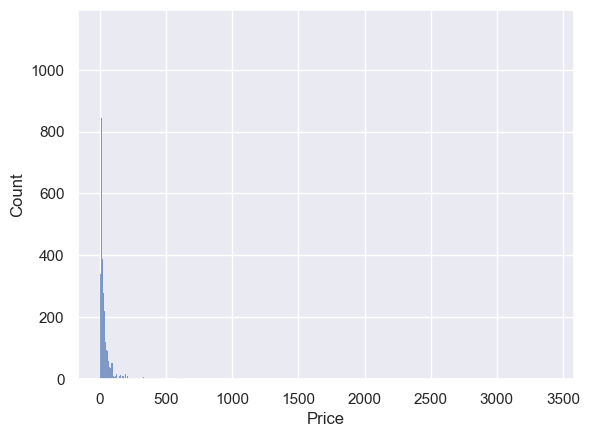

In [10]:
sns.histplot(data_no_mv['Price'])

### Dealing with outliers

In [11]:
# Declare a variable that will be equal to the 90th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
count,8569,8569,8569,8569,8569.000000,8569.000000,8569.000000,8569.000000
unique,6645,30,622,2705,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN
freq,43,2621,324,40,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.883265,408.679543,32.801334,2014.887618
std,NaN,NaN,NaN,NaN,0.302179,858.340450,41.487180,3.145528
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,1988.000000
25%,NaN,NaN,NaN,NaN,3.700000,65.000000,10.630000,2014.000000
50%,NaN,NaN,NaN,NaN,3.900000,157.000000,17.950000,2016.000000
75%,NaN,NaN,NaN,NaN,4.100000,398.000000,37.450000,2017.000000


<Axes: xlabel='Price', ylabel='Count'>

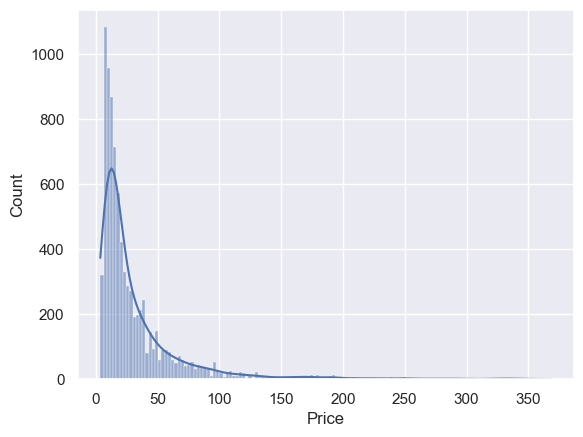

In [12]:
sns.histplot(data_1['Price'],kde=True)

<Axes: xlabel='Rating', ylabel='Count'>

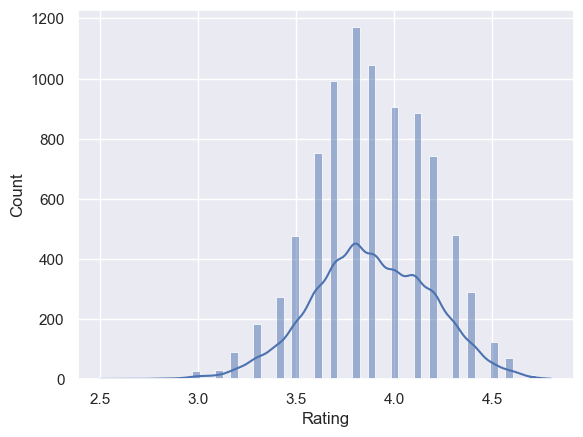

In [13]:
sns.histplot(data_1['Rating'],kde=True)

<Axes: xlabel='NumberOfRatings', ylabel='Count'>

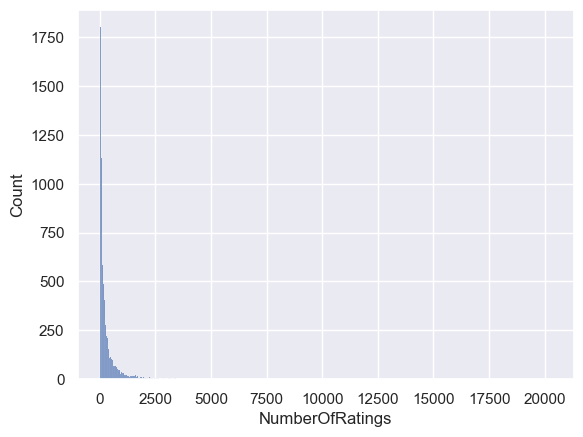

In [14]:
sns.histplot(data_1['NumberOfRatings'])

In [15]:
# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_1['NumberOfRatings'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_2 = data_1[data_1['NumberOfRatings']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_2.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
count,8483,8483,8483,8483,8483.000000,8483.000000,8483.000000,8483.000000
unique,6590,30,620,2702,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN
freq,42,2594,307,39,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.882200,347.929506,32.771766,2014.884239
std,NaN,NaN,NaN,NaN,0.302133,519.387969,41.210753,3.151715
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,1988.000000
25%,NaN,NaN,NaN,NaN,3.700000,65.000000,10.650000,2014.000000
50%,NaN,NaN,NaN,NaN,3.900000,154.000000,17.950000,2016.000000
75%,NaN,NaN,NaN,NaN,4.100000,383.500000,37.615000,2017.000000


<Axes: xlabel='NumberOfRatings', ylabel='Count'>

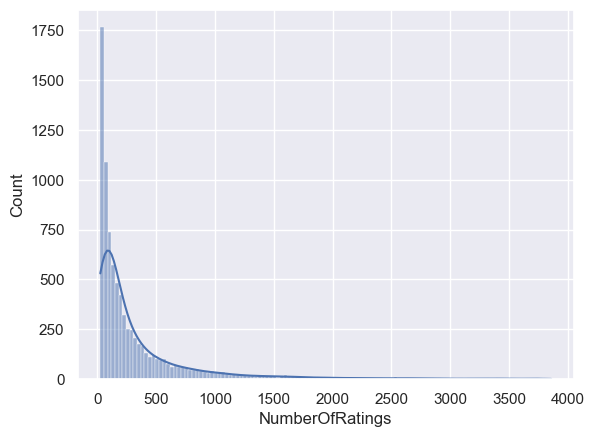

In [16]:
sns.histplot(data_2['NumberOfRatings'],kde=True)

<Axes: xlabel='Year', ylabel='Count'>

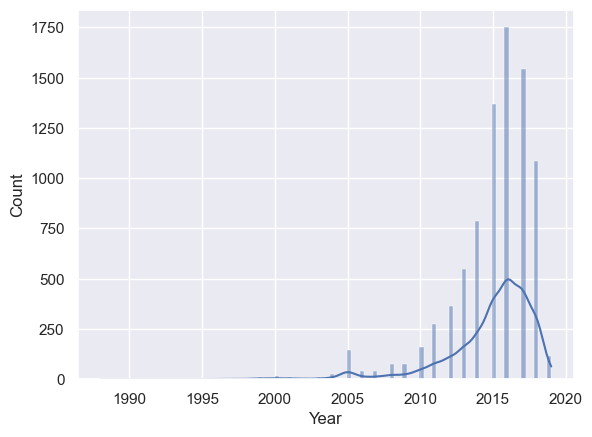

In [17]:
sns.histplot(data_2['Year'], kde=True)

In [18]:
# Outliers are on the low end, Taking off very old vintage wines
q = data_2['Year'].quantile(0.01)
data_3 = data_2[data_2['Year']>q]

<Axes: xlabel='Year', ylabel='Count'>

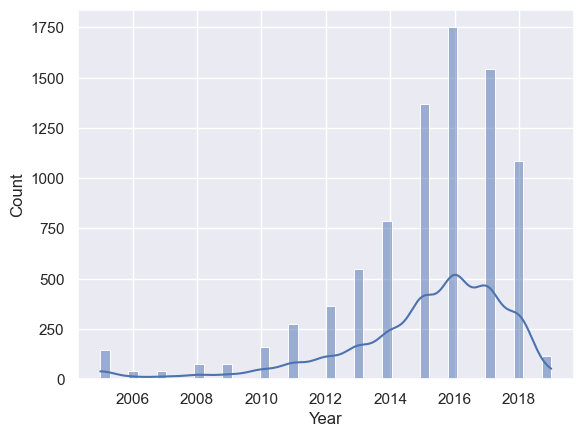

In [19]:
sns.histplot(data_3['Year'], kde=True)

In [20]:
data_cleaned = data_3.reset_index(drop=True)

In [21]:
data_cleaned.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
count,8378,8378,8378,8378,8378.000000,8378.000000,8378.000000,8378.000000
unique,6494,30,619,2694,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN
freq,42,2587,305,37,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.878503,347.829076,31.977637,2015.064813
std,NaN,NaN,NaN,NaN,0.301340,517.363200,40.168796,2.701226
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,2005.000000
25%,NaN,NaN,NaN,NaN,3.700000,65.000000,10.522500,2014.000000
50%,NaN,NaN,NaN,NaN,3.900000,155.000000,17.890000,2016.000000
75%,NaN,NaN,NaN,NaN,4.100000,385.000000,36.740000,2017.000000


# Part 2 - Checking the OLS assumptions

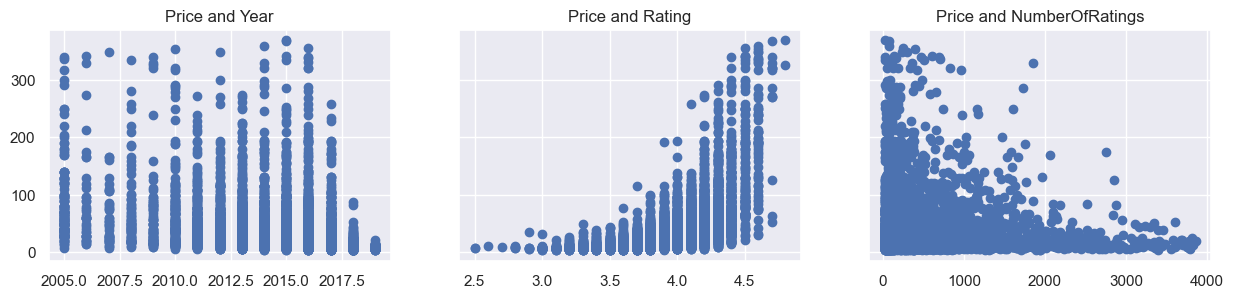

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['Rating'],data_cleaned['Price'])
ax2.set_title('Price and Rating')
ax3.scatter(data_cleaned['NumberOfRatings'],data_cleaned['Price'])
ax3.set_title('Price and NumberOfRatings')

plt.show()

### Relaxing the assumptions

In [23]:
# transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,log_price
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011.0,4.553877
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017.0,2.740840
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015.0,2.008214
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019.0,2.165619
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016.0,3.372455
...,...,...,...,...,...,...,...,...,...
8373,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016.0,2.801541
8374,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016.0,3.000222
8375,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010.0,3.175968
8376,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019.0,1.826161


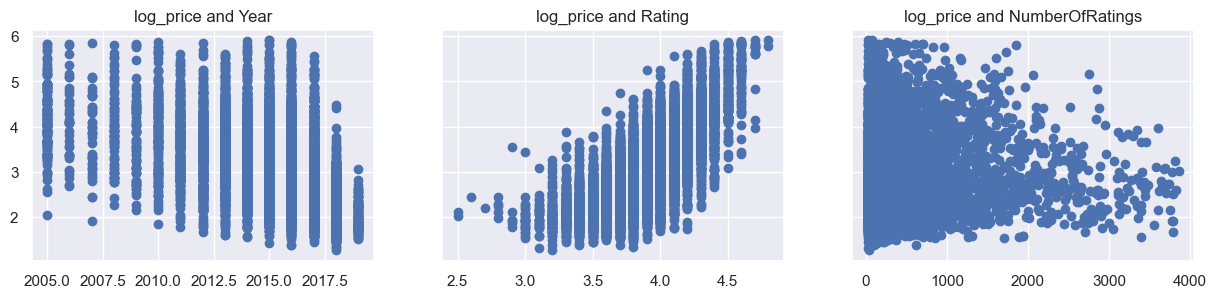

In [24]:
# Build Scatter Plots with log_price
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['Rating'],data_cleaned['log_price'])
ax2.set_title('log_price and Rating')
ax3.scatter(data_cleaned['NumberOfRatings'],data_cleaned['log_price'])
ax3.set_title('log_price and NumberOfRatings')


plt.show()

In [25]:
# Let's transform 'log_NumberOfRatings' with a log transformation
log_NumberOfRatings = np.log(data_cleaned['NumberOfRatings'])

# Then we add it to our data frame
data_cleaned['log_NumberOfRatings'] = log_NumberOfRatings
data_cleaned

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,log_price,log_NumberOfRatings
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011.0,4.553877,4.605170
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017.0,2.740840,4.605170
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015.0,2.008214,4.605170
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019.0,2.165619,4.605170
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016.0,3.372455,4.605170
...,...,...,...,...,...,...,...,...,...,...
8373,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016.0,2.801541,6.901737
8374,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016.0,3.000222,6.902743
8375,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010.0,3.175968,6.903747
8376,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019.0,1.826161,6.905753


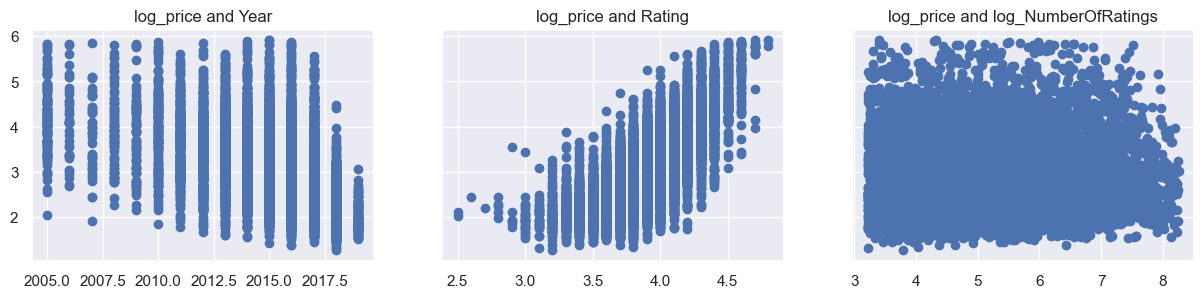

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['Rating'],data_cleaned['log_price'])
ax2.set_title('log_price and Rating')
ax3.scatter(data_cleaned['log_NumberOfRatings'],data_cleaned['log_price'])
ax3.set_title('log_price and log_NumberOfRatings')

plt.show()

In [27]:
# Let's transform 'Year' with a log transformation
log_year = np.log(data_cleaned['Year'])

# Then we add it to our data frame
data_cleaned['log_year'] = log_year
data_cleaned

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,log_price,log_NumberOfRatings,log_year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011.0,4.553877,4.605170,7.606387
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017.0,2.740840,4.605170,7.609367
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015.0,2.008214,4.605170,7.608374
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019.0,2.165619,4.605170,7.610358
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016.0,3.372455,4.605170,7.608871
...,...,...,...,...,...,...,...,...,...,...,...
8373,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016.0,2.801541,6.901737,7.608871
8374,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016.0,3.000222,6.902743,7.608871
8375,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010.0,3.175968,6.903747,7.605890
8376,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019.0,1.826161,6.905753,7.610358


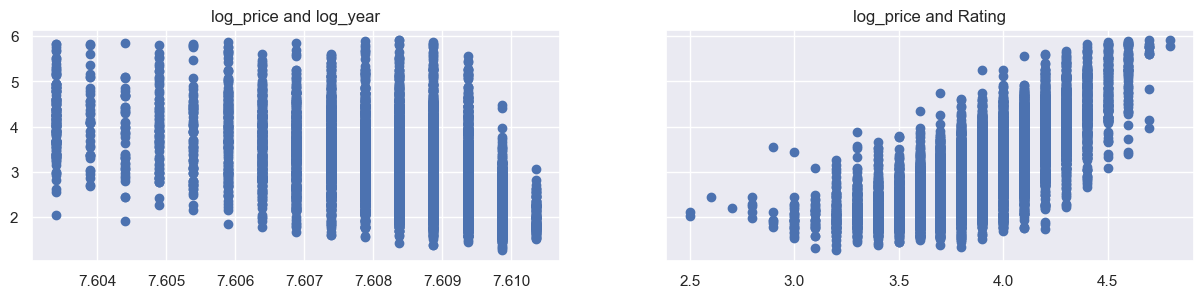

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['log_year'],data_cleaned['log_price'])
ax1.set_title('log_price and log_year')
ax2.scatter(data_cleaned['Rating'],data_cleaned['log_price'])
ax2.set_title('log_price and Rating')

plt.show()

In [29]:
## drop log_NumberOfRatings and Price from the data
data_cleaned = data_cleaned.drop(['Price','log_NumberOfRatings'],axis=1)

In [30]:
data_cleaned.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Year,log_price,log_year
count,8378,8378,8378,8378,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
unique,6494,30,619,2694,NaN,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN,NaN
freq,42,2587,305,37,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.878503,347.829076,2015.064813,3.031069,7.608406
std,NaN,NaN,NaN,NaN,0.301340,517.363200,2.701226,0.862471,0.001342
min,NaN,NaN,NaN,NaN,2.500000,25.000000,2005.000000,1.266948,7.603399
25%,NaN,NaN,NaN,NaN,3.700000,65.000000,2014.000000,2.353516,7.607878
50%,NaN,NaN,NaN,NaN,3.900000,155.000000,2016.000000,2.884242,7.608871
75%,NaN,NaN,NaN,NaN,4.100000,385.000000,2017.000000,3.603866,7.609367


### Multicollinearity

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# we will explore only numerical data so far
variables = data_cleaned[['Rating','Year']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [32]:
vif

,VIF,Features
0,164.841865,Rating
1,164.841865,Year


In [33]:
# vif is very high, we will check simple correlation
data_cleaned[['Rating', 'Year']].corr()

,Rating,Year
Rating,1.000000,-0.314357
Year,-0.314357,1.000000


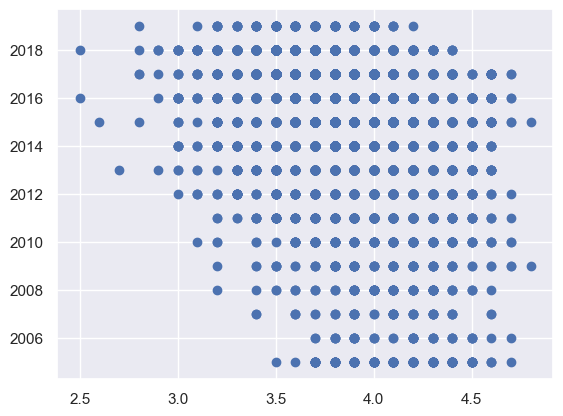

In [34]:
plt.scatter(data_cleaned['Rating'],data_cleaned['Year'])

In [35]:
## Year and Rating do not have significant correlation, the VIF is high due to different data scale
data_no_multicollinearity = data_cleaned

# Part 3 - Create Dummy Variables

In [36]:
data_no_multicollinearity.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Year,log_price,log_year
count,8378,8378,8378,8378,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
unique,6494,30,619,2694,NaN,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN,NaN
freq,42,2587,305,37,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.878503,347.829076,2015.064813,3.031069,7.608406
std,NaN,NaN,NaN,NaN,0.301340,517.363200,2.701226,0.862471,0.001342
min,NaN,NaN,NaN,NaN,2.500000,25.000000,2005.000000,1.266948,7.603399
25%,NaN,NaN,NaN,NaN,3.700000,65.000000,2014.000000,2.353516,7.607878
50%,NaN,NaN,NaN,NaN,3.900000,155.000000,2016.000000,2.884242,7.608871
75%,NaN,NaN,NaN,NaN,4.100000,385.000000,2017.000000,3.603866,7.609367


In [37]:
## Leave only Country as a dummy variable

In [38]:
data_no_multicollinearity.drop(['Name','Region','Winery'],axis=1,inplace=True)
data_no_multicollinearity.describe(include='all')

,Country,Rating,NumberOfRatings,Year,log_price,log_year
count,8378,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
unique,30,NaN,NaN,NaN,NaN,NaN
top,Italy,NaN,NaN,NaN,NaN,NaN
freq,2587,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.878503,347.829076,2015.064813,3.031069,7.608406
std,NaN,0.301340,517.363200,2.701226,0.862471,0.001342
min,NaN,2.500000,25.000000,2005.000000,1.266948,7.603399
25%,NaN,3.700000,65.000000,2014.000000,2.353516,7.607878
50%,NaN,3.900000,155.000000,2016.000000,2.884242,7.608871
75%,NaN,4.100000,385.000000,2017.000000,3.603866,7.609367


In [39]:
## Inspecting Country column 

In [40]:
print("🔍 Unique countries and their counts:")
print(data_no_multicollinearity['Country'].value_counts(dropna=False))

🔍 Unique countries and their counts:
Country
Italy            2587
France           2140
Spain            1099
South Africa      495
United States     353
Chile             316
Germany           248
Australia         240
Argentina         235
Portugal          227
Austria           220
New Zealand        63
Brazil             39
Romania            23
Israel             13
Greece             13
Switzerland        12
Hungary             9
Moldova             8
Slovenia            8
Lebanon             6
Turkey              6
Georgia             5
Uruguay             4
Croatia             2
Bulgaria            2
Canada              2
Mexico              1
China               1
Slovakia            1
Name: count, dtype: int64


In [41]:
print("Number of null (missing) values in 'Country':")
print(data_no_multicollinearity['Country'].isnull().sum())

Number of null (missing) values in 'Country':
0


In [42]:
## Group Countries with less than 100 wines into Other group to eliminate Noise and avoid overfitting
# Count how many times each country appears
country_counts = data_no_multicollinearity['Country'].value_counts()

# Define a threshold (e.g., < 100)
threshold = 100
rare_countries = country_counts[country_counts < threshold].index

# Replace rare countries with 'Other'
data_no_multicollinearity['Country_cleaned'] = data_no_multicollinearity['Country'].replace(rare_countries, 'Other')

In [43]:
data_no_multicollinearity.head()

,Country,Rating,NumberOfRatings,Year,log_price,log_year,Country_cleaned
0,France,4.2,100,2011.0,4.553877,7.606387,France
1,France,4.3,100,2017.0,2.740840,7.609367,France
2,Italy,3.9,100,2015.0,2.008214,7.608374,Italy
3,Italy,3.5,100,2019.0,2.165619,7.610358,Italy
4,Austria,3.9,100,2016.0,3.372455,7.608871,Austria


In [44]:
print("🔍 Unique countries and their counts:")
print(data_no_multicollinearity['Country_cleaned'].value_counts(dropna=False))

🔍 Unique countries and their counts:
Country_cleaned
Italy            2587
France           2140
Spain            1099
South Africa      495
United States     353
Chile             316
Germany           248
Australia         240
Argentina         235
Portugal          227
Austria           220
Other             218
Name: count, dtype: int64


In [57]:
# Drop the original 'Country' column
data_no_multicollinearity = data_no_multicollinearity.drop('Country', axis=1)

# Rename 'Country_cleaned' to 'Country'
data_no_multicollinearity = data_no_multicollinearity.rename(columns={'Country_cleaned': 'Country'})

In [47]:
# Create Dummy Variables and make sure one of dominant ones is out

data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [48]:
data_with_dummies.head()

,Rating,NumberOfRatings,Year,log_price,log_year,Country_Australia,Country_Austria,Country_Chile,Country_France,Country_Germany,Country_Italy,Country_Other,Country_Portugal,Country_South Africa,Country_Spain,Country_United States
0,4.2,100,2011.0,4.553877,7.606387,False,False,False,True,False,False,False,False,False,False,False
1,4.3,100,2017.0,2.740840,7.609367,False,False,False,True,False,False,False,False,False,False,False
2,3.9,100,2015.0,2.008214,7.608374,False,False,False,False,False,True,False,False,False,False,False
3,3.5,100,2019.0,2.165619,7.610358,False,False,False,False,False,True,False,False,False,False,False
4,3.9,100,2016.0,3.372455,7.608871,False,True,False,False,False,False,False,False,False,False,False


In [49]:
data_with_dummies.describe(include='all')

,Rating,NumberOfRatings,Year,log_price,log_year,Country_Australia,Country_Austria,Country_Chile,Country_France,Country_Germany,Country_Italy,Country_Other,Country_Portugal,Country_South Africa,Country_Spain,Country_United States
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,8138,8158,8062,6238,8130,5791,8160,8151,7883,7279,8025
mean,3.878503,347.829076,2015.064813,3.031069,7.608406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.301340,517.363200,2.701226,0.862471,0.001342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.500000,25.000000,2005.000000,1.266948,7.603399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.700000,65.000000,2014.000000,2.353516,7.607878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.900000,155.000000,2016.000000,2.884242,7.608871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.100000,385.000000,2017.000000,3.603866,7.609367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Rearrange a bit

In [50]:
data_with_dummies.columns.values

array(['Rating', 'NumberOfRatings', 'Year', 'log_price', 'log_year',
       'Country_Australia', 'Country_Austria', 'Country_Chile',
       'Country_France', 'Country_Germany', 'Country_Italy',
       'Country_Other', 'Country_Portugal', 'Country_South Africa',
       'Country_Spain', 'Country_United States'], dtype=object)

In [51]:
## Create a variable with preferred oreder of columns
cols = ['log_price','Rating', 'NumberOfRatings', 'Year', 'log_year',
       'Country_Australia', 'Country_Austria', 'Country_Chile',
       'Country_France', 'Country_Germany', 'Country_Italy', 'Country_Portugal', 'Country_South Africa',
       'Country_Spain', 'Country_United States','Country_Other']

In [52]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Rating,NumberOfRatings,Year,log_year,Country_Australia,Country_Austria,Country_Chile,Country_France,Country_Germany,Country_Italy,Country_Portugal,Country_South Africa,Country_Spain,Country_United States,Country_Other
0,4.553877,4.2,100,2011.0,7.606387,False,False,False,True,False,False,False,False,False,False,False
1,2.740840,4.3,100,2017.0,7.609367,False,False,False,True,False,False,False,False,False,False,False
2,2.008214,3.9,100,2015.0,7.608374,False,False,False,False,False,True,False,False,False,False,False
3,2.165619,3.5,100,2019.0,7.610358,False,False,False,False,False,True,False,False,False,False,False
4,3.372455,3.9,100,2016.0,7.608871,False,True,False,False,False,False,False,False,False,False,False


In [53]:
## Convert dummy values from booleans into integers
data_preprocessed = data_preprocessed.astype({col: int for col in data_preprocessed.select_dtypes(include='bool').columns})

In [54]:
data_preprocessed.head()

,log_price,Rating,NumberOfRatings,Year,log_year,Country_Australia,Country_Austria,Country_Chile,Country_France,Country_Germany,Country_Italy,Country_Portugal,Country_South Africa,Country_Spain,Country_United States,Country_Other
0,4.553877,4.2,100,2011.0,7.606387,0,0,0,1,0,0,0,0,0,0,0
1,2.740840,4.3,100,2017.0,7.609367,0,0,0,1,0,0,0,0,0,0,0
2,2.008214,3.9,100,2015.0,7.608374,0,0,0,0,0,1,0,0,0,0,0
3,2.165619,3.5,100,2019.0,7.610358,0,0,0,0,0,1,0,0,0,0,0
4,3.372455,3.9,100,2016.0,7.608871,0,1,0,0,0,0,0,0,0,0,0


### Check VIF of independent variables

In [55]:
# Let's simply drop log_price from data_preprocessed
variables = data_preprocessed.drop(['log_price', 'Year'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,172.733703,Rating
1,1.548830,NumberOfRatings
2,201.933941,log_year
3,2.033353,Country_Australia
4,1.966805,Country_Austria
5,2.350421,Country_Chile
6,10.284704,Country_France
7,2.096644,Country_Germany
8,12.179882,Country_Italy
9,1.973797,Country_Portugal


In [56]:
# Let's simply drop log_price from data_preprocessed
variables = data_preprocessed.drop(['log_price', 'log_year'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,171.190985,Rating
1,1.548755,NumberOfRatings
2,199.847631,Year
3,2.032798,Country_Australia
4,1.966257,Country_Austria
5,2.349791,Country_Chile
6,10.269249,Country_France
7,2.095364,Country_Germany
8,12.171010,Country_Italy
9,1.972998,Country_Portugal


In [60]:
# As said before Rating and Year can appear to be collinear, 
# Italy, France and Spain make more than 70% of values, that explains high VIF
# Scaling might help